In [ ]:
!pip3 install pyenchant
!apt update
!apt install enchant --fix-missing
!apt install -qq enchant
!pip install pyenchant
!pip install textblob
! pip install tensorflow_text

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Hit:1 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Hit:2 http://archive.ubuntu.com/ubuntu focal InRelease
Hit:3 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Hit:4 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease
Get:5 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Hit:6 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Hit:7 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu focal InRelease
Get:8 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Hit:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Hit:10 http://ppa.launchpad.net/ubuntugis/ppa/ubuntu focal InRelease
Get:11 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Fetched 336 kB in 2s (215 kB/s)
Reading package lists... Done
Building dependency tree       
Reading s

In [ ]:
import nltk
import string
import re
import inflect
from textblob import TextBlob
p = inflect.engine()
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords
import enchant
import string
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
lemmatizer = WordNetLemmatizer()
import csv


import sklearn
#stopwords = stopwords.words('english')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
import spacy
from spacy import displacy
nlp = spacy.load("en_core_web_sm")
import networkx as nx

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
ref_text = """An array is a collection of items stored at contiguous memory locations. The idea is to store multiple items of the same type together. 
This makes it easier to calculate the position of each element by simply adding an offset to a base value, i.e., the memory location of the first element of the array (generally denoted by the name of the array).
It can be looked as a top-level view of a staircase where you are at the base of the staircase. 
Each element can be uniquely identified by their index in the array (in a similar way as you could identify your friends by the step on which they were on in the above example).

"""

In [ ]:
input_text = """ Array can be understood as many items which are stored at different locations.But the items are supoosed to be of same type,i.e. a book 
cannot be stored together with a bat.We can hence easily know which element is at which position,by the memory location of the first element of the array.We can
visualize it as being stood over at the top of an escalator.However,every element since stored at different position can be uniquely identified by the index 
of the array as in how we can tell who is on which step of the elevator.
"""

In [ ]:
def text_lowercase(text):
    print("\nLOWERED TEXT : \n", text.lower())
    return text.lower()


def convert_number(text):
    temp_str = text.split()
    new_string = []
 
    for word in temp_str:
        if word.isdigit():
            temp = p.number_to_words(word)
            new_string.append(temp)
        else:
            new_string.append(word)

    temp_str = ' '.join(new_string)
    print("\nNUMBERS CONVERTED TEXT : \n", temp_str)
    return temp_str

def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    print("\n PUNCTUATION REMOVED TEXT : \n", text.translate(translator))
    return text.translate(translator)

In [ ]:
def remove_stopwords(text):
    stop_words = set(stopwords.words("english"))
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word not in stop_words]
    separator = ' '
    print("\n STOPWORD REMOVED TEXT : \n", separator.join(filtered_text))
    return separator.join(filtered_text)

In [ ]:
def lemmatize_word(text):
    word_tokens = word_tokenize(text)
    # provide context i.e. part-of-speech
    lemmas = [lemmatizer.lemmatize(word, pos ='v') for word in word_tokens]
    separator = ' '
    print("\n LEMMATIZED TEXT : \n", separator.join(lemmas))
    return separator.join(lemmas)

In [ ]:
def translator(user_string):
    user_string = user_string.split(" ")
    j = 0
    for _str in user_string:
        # File path which consists of Abbreviations.
        
        fileName = "/content/drive/MyDrive/AI Project/Abbreviations datasets/List_of_computing_and_IT_abbreviations.txt"
        # File Access mode [Read Mode]
        accessMode = "r"
        with open(fileName, accessMode) as myCSVfile:
            # Reading file as CSV with delimiter as "=", so that abbreviation are stored in row[0] and phrases in row[1]
            dataFromFile = csv.reader(myCSVfile, delimiter="—")
            # Removing Special Characters.
            _str = re.sub('[^a-zA-Z0-9-_.]', '', _str)
            for col in dataFromFile:
                # Check if selected word matches short forms[LHS] in text file.
                if _str.upper() == col[0]:
                    # If match found replace it with its appropriate phrase in text file.
                    user_string[j] = col[1]
            myCSVfile.close()
        j = j + 1
    # Replacing commas with spaces for final output.
    userr=' '.join(user_string)
    print("\n ABBREVIATIONS REMOVED TEXT : \n", userr)
    return userr

In [ ]:
def correct_sentence_spelling(sentence):
   
    sentence = TextBlob(sentence)
    
    result = sentence.correct()
    print("\n SPELLCHECKED TEXT : \n", result)
    return result

In [ ]:
def preprocessing_text(text):
  print("\n ORIGINAL TEXT : \n", text)
  text = text_lowercase(text)
  text = remove_numbers(text)
  text = convert_number(text)
  text = remove_punctuation(text)
  text = remove_stopwords(text)
  text = lemmatize_word(text)
  text = translator(text)
  text = correct_sentence_spelling(text)
  return str(text)

In [ ]:
processed_ref_text = preprocessing_text(ref_text)
print("REFERENCE TEXT :\n")
print(ref_text)
print("\n PROCESSED REFERENCE TEXT :\n")
print(processed_ref_text)


 ORIGINAL TEXT : 
 An array is a collection of items stored at contiguous memory locations. The idea is to store multiple items of the same type together. 
This makes it easier to calculate the position of each element by simply adding an offset to a base value, i.e., the memory location of the first element of the array (generally denoted by the name of the array).
It can be looked as a top-level view of a staircase where you are at the base of the staircase. 
Each element can be uniquely identified by their index in the array (in a similar way as you could identify your friends by the step on which they were on in the above example).



LOWERED TEXT : 
 an array is a collection of items stored at contiguous memory locations. the idea is to store multiple items of the same type together. 
this makes it easier to calculate the position of each element by simply adding an offset to a base value, i.e., the memory location of the first element of the array (generally denoted by the name 

In [ ]:
processed_input_text = preprocessing_text(input_text)
print("INPUT TEXT :\n")
print(input_text)
print("\n PROCESSED INPUT TEXT :\n")
print(processed_input_text)


 ORIGINAL TEXT : 
  Array can be understood as many items which are stored at different locations.But the items are supoosed to be of same type,i.e. a book 
cannot be stored together with a bat.We can hence easily know which element is at which position,by the memory location of the first element of the array.We can
visualize it as being stood over at the top of an escalator.However,every element since stored at different position can be uniquely identified by the index 
of the array as in how we can tell who is on which step of the elevator.


LOWERED TEXT : 
  array can be understood as many items which are stored at different locations.but the items are supoosed to be of same type,i.e. a book 
cannot be stored together with a bat.we can hence easily know which element is at which position,by the memory location of the first element of the array.we can
visualize it as being stood over at the top of an escalator.however,every element since stored at different position can be uniquely

In [ ]:
NER = spacy.load("en_core_web_sm")

doc = nlp(processed_input_text)

for tok in doc:
  print(tok.text, "...", tok.dep_)

array ... nsubj
understand ... ROOT
many ... amod
items ... nsubj
store ... ccomp
different ... amod
locationsbut ... amod
items ... dobj
supposed ... amod
type ... compound
book ... compound
store ... dobj
together ... advmod
bathe ... npadvmod
hence ... advmod
easily ... advmod
know ... advcl
element ... compound
position ... compound
memory ... compound
location ... nmod
first ... amod
element ... compound
arrange ... nsubj
visualized ... amod
stand ... nmod
top ... amod
escalatorhoweverevery ... compound
element ... dobj
since ... mark
store ... nmod
different ... amod
position ... nsubj
unique ... amod
identify ... compound
index ... compound
array ... nsubj
tell ... advcl
step ... compound
elevator ... dobj


In [ ]:
from sklearn.feature_extraction. text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features= 100, max_df =0.5, smooth_idf=True)
X = vectorizer.fit_transform(processed_input_text.split())
X.shape
from sklearn.decomposition import TruncatedSVD
svd_model = TruncatedSVD(n_components=20, algorithm='randomized', n_iter=100, random_state=122)
svd_model.fit(X)
len(svd_model. components_)
svd_model

TruncatedSVD(n_components=20, n_iter=100, random_state=122)

In [ ]:
terms = vectorizer.get_feature_names_out()

topics = {}

for i, comp in enumerate(svd_model.components_):

  terms_comp = zip(terms, comp)
  sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:7]
#  print("\nTopic "+str(i)+": ", end = " ")
  li = []
  
  for t in sorted_terms:
   # print(t[0], end =" ")
    li.append(t[0])

  topics[i] = ' '.join([str(elem) for elem in li])

for k,v in topics.items():
  print("TOPIC", k, ":",v)

TOPIC 0 : element book easily type memory locationsbut identify
TOPIC 1 : store element different book elevator items identify
TOPIC 2 : items different array index identify book type
TOPIC 3 : different array identify type book tell store
TOPIC 4 : array position store element type book supposed
TOPIC 5 : position different items store location locationsbut index
TOPIC 6 : index step visualized location unique identify book
TOPIC 7 : tell visualized identify type easily location book
TOPIC 8 : easily locationsbut escalatorhoweverevery memory book identify index
TOPIC 9 : index unique stand understand know type escalatorhoweverevery
TOPIC 10 : identify location type memory understand step easily
TOPIC 11 : location escalatorhoweverevery supposed visualized understand identify elevator
TOPIC 12 : tell unique step escalatorhoweverevery memory supposed bathe
TOPIC 13 : easily location bathe escalatorhoweverevery know tell stand
TOPIC 14 : escalatorhoweverevery step identify stand book kno

In [ ]:
def sentimentSimilarity(text):
  words = text.split()
  G = nx.Graph()
  for word in words:
    G.add_node(word)

  for i in range(len(words)):
    for j in range(i+1, len(words)):
      word1 = words[i]
      word2 = words[j]
      similarity = nlp(word1).similarity(nlp(word2))
      G.add_edge(word1, word2, weight=similarity)
  plt.figure(figsize=(10, 6))
  pos = nx.spring_layout(G)
  nx.draw_networkx_nodes(G, pos, node_size=1000)
  nx.draw_networkx_edges(G, pos)
  nx.draw_networkx_labels(G, pos, font_size=10)
  edge_labels = nx.get_edge_attributes(G, 'weight')
  nx.draw_networkx_edge_labels(G, pos, edge_labels)

  plt.show()


TOPIC 0 :


<ipython-input-50-3c80a553d10f>:11: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  similarity = nlp(word1).similarity(nlp(word2))


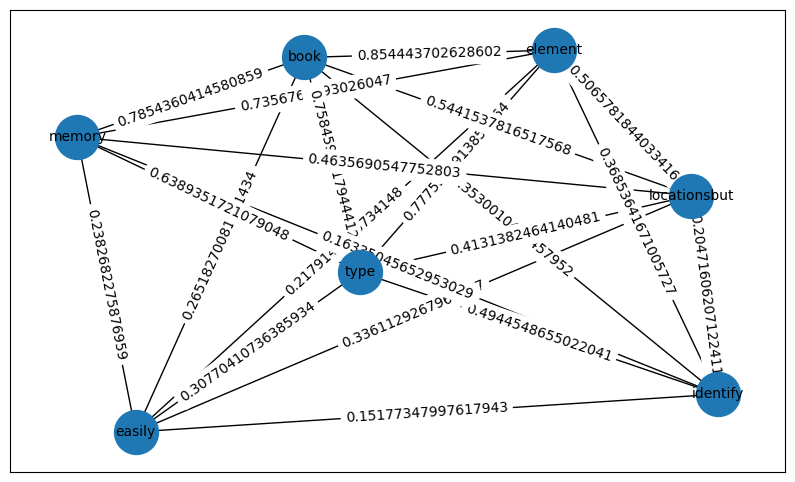

TOPIC 1 :


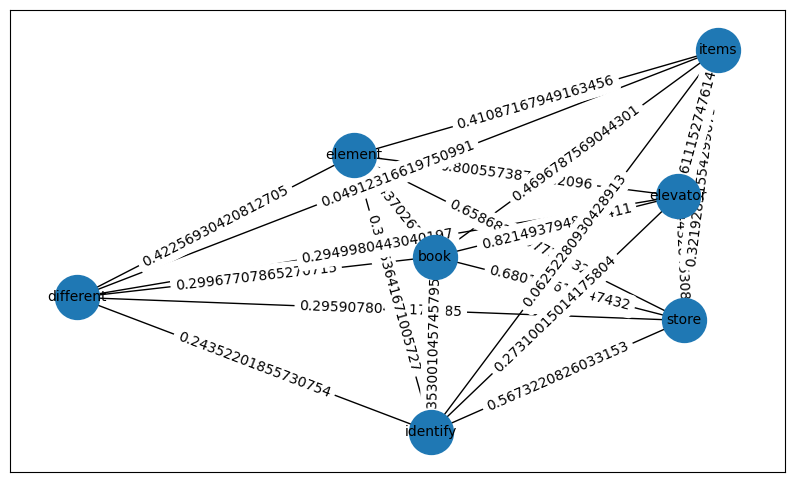

TOPIC 2 :


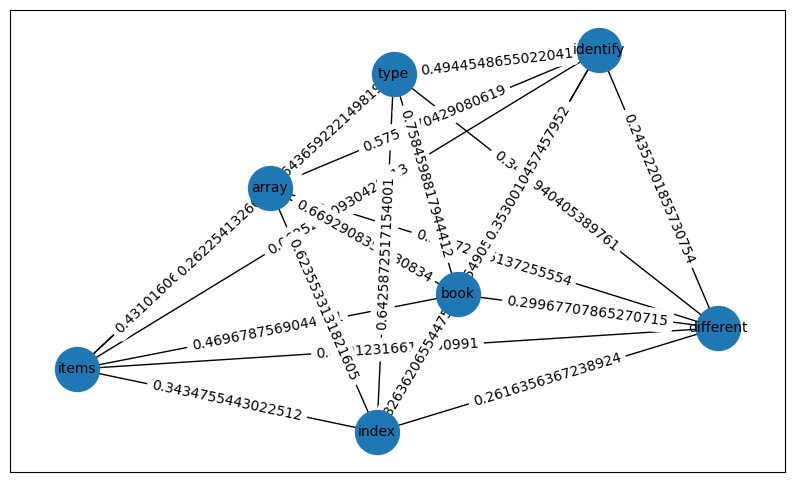

TOPIC 3 :


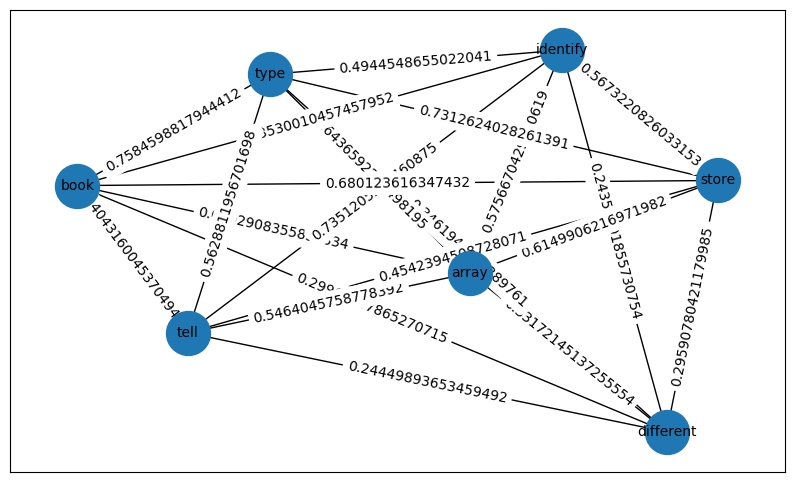

TOPIC 4 :


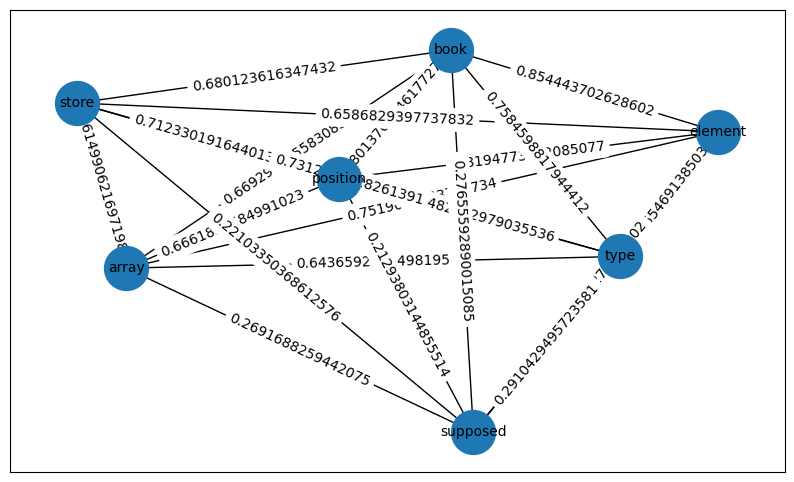

TOPIC 5 :


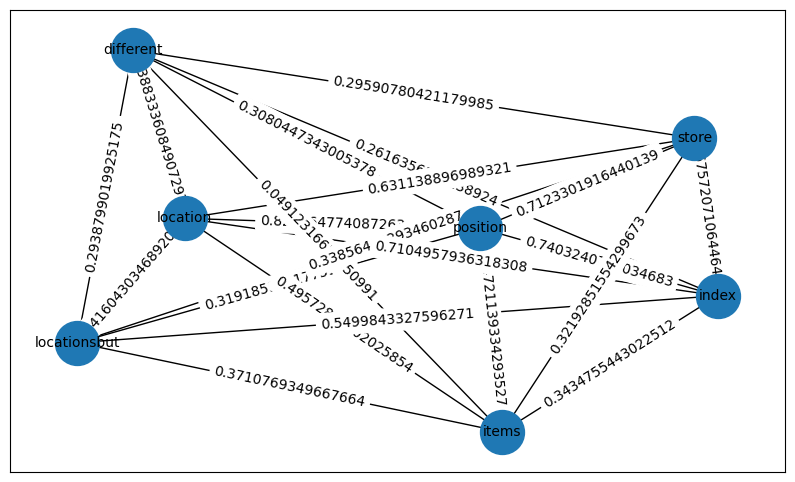

TOPIC 6 :


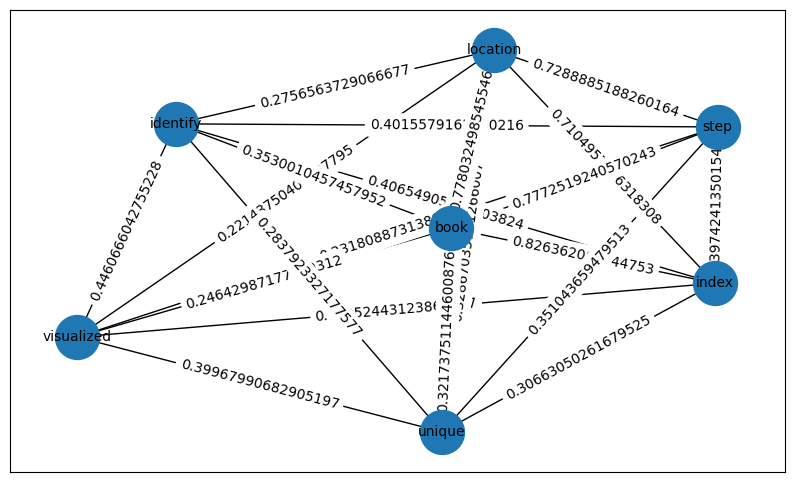

TOPIC 7 :


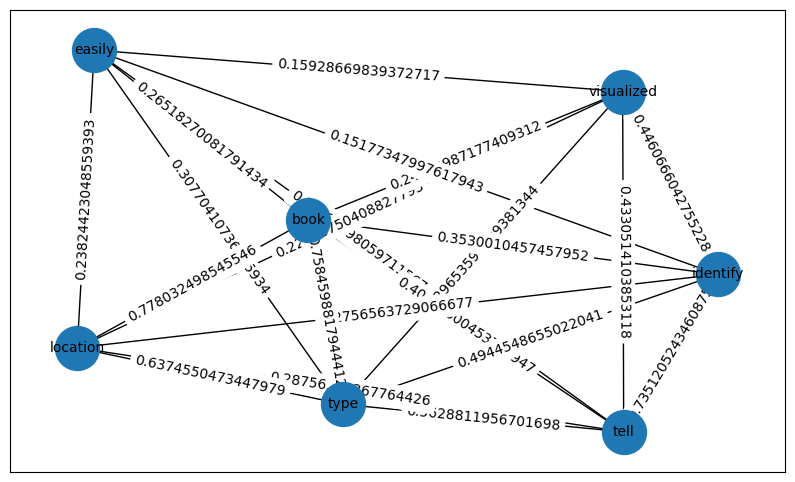

TOPIC 8 :


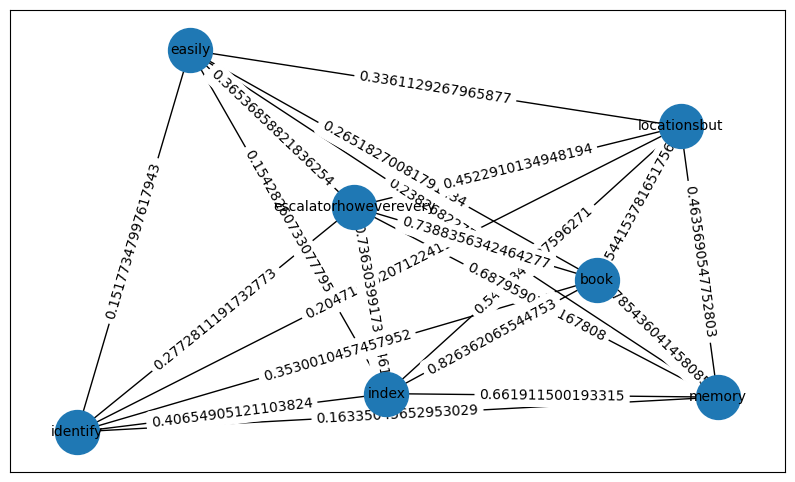

TOPIC 9 :


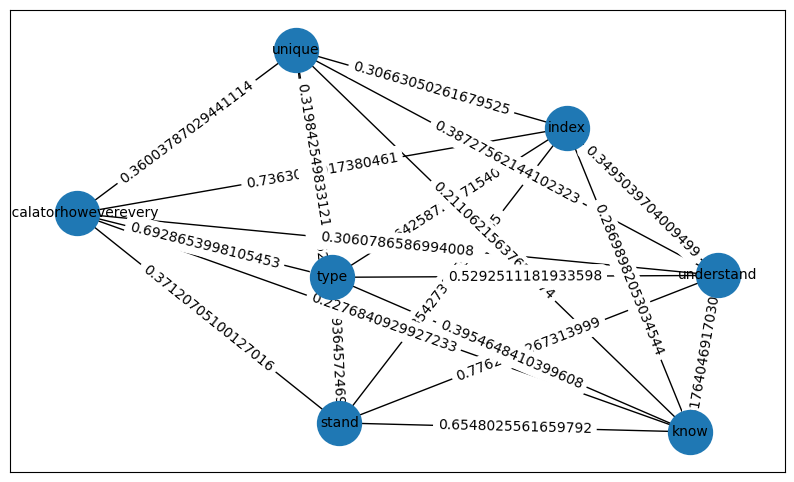

TOPIC 10 :


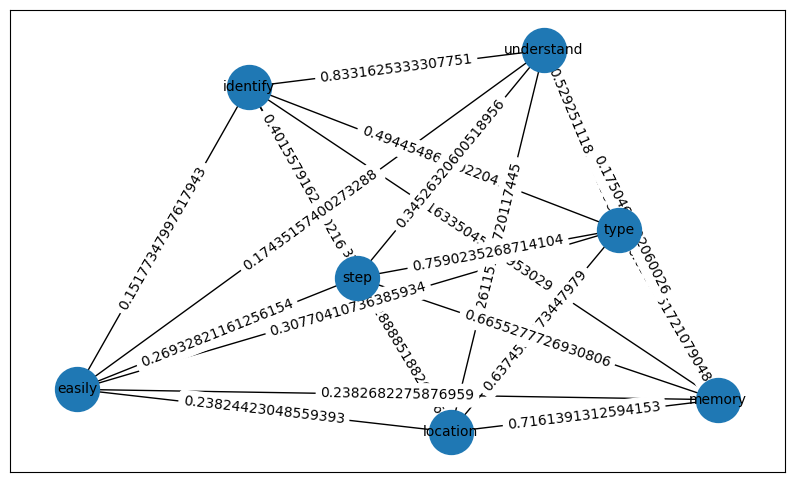

TOPIC 11 :


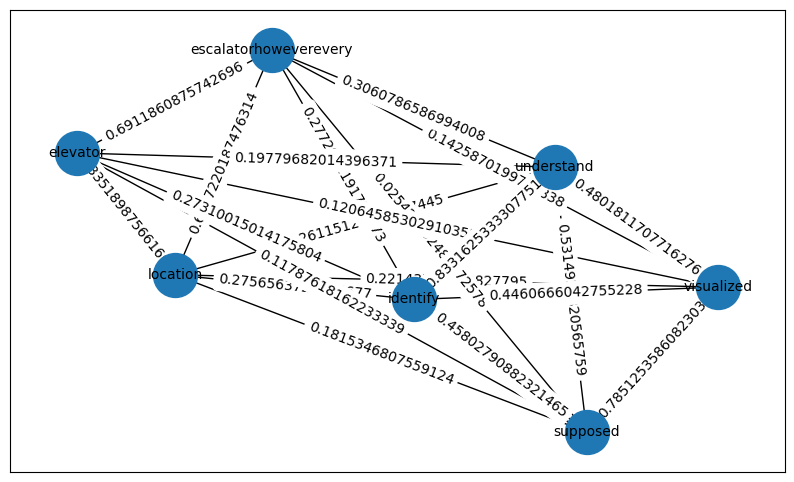

TOPIC 12 :


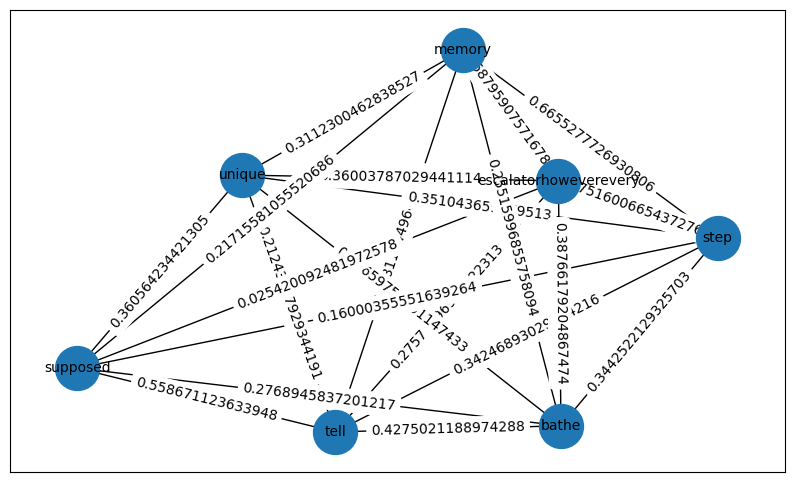

TOPIC 13 :


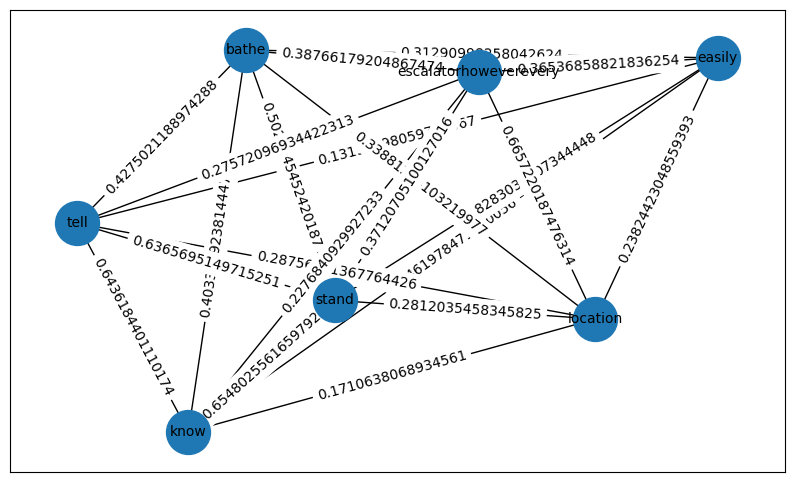

TOPIC 14 :


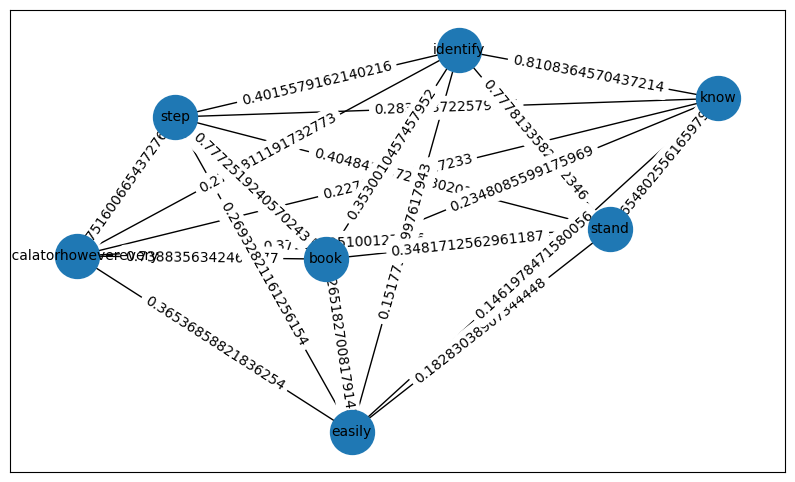

TOPIC 15 :


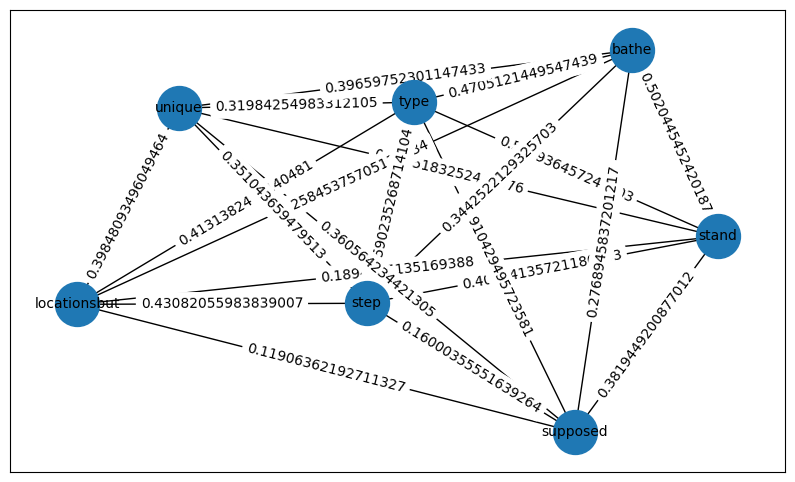

TOPIC 16 :


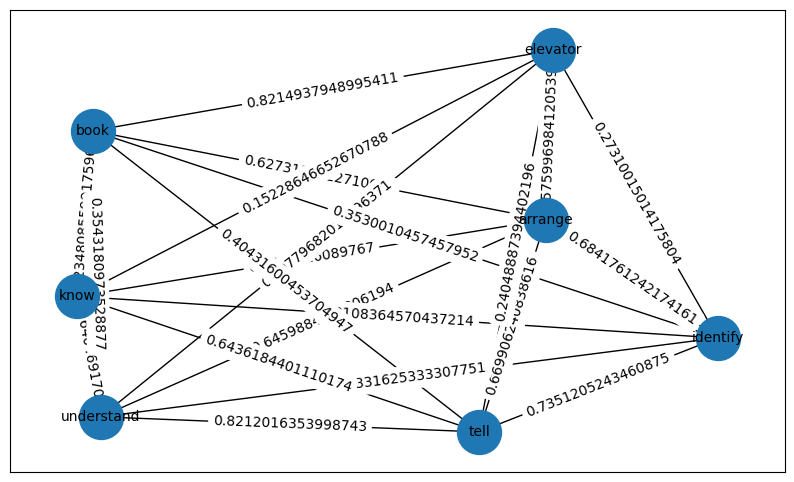

TOPIC 17 :


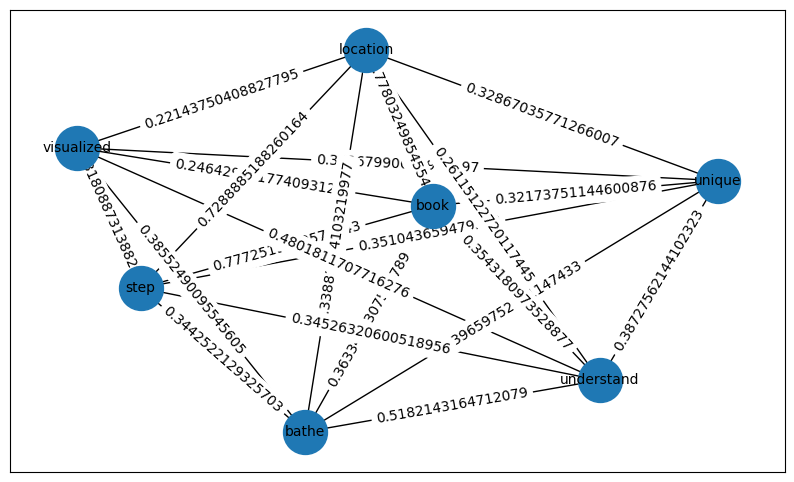

TOPIC 18 :


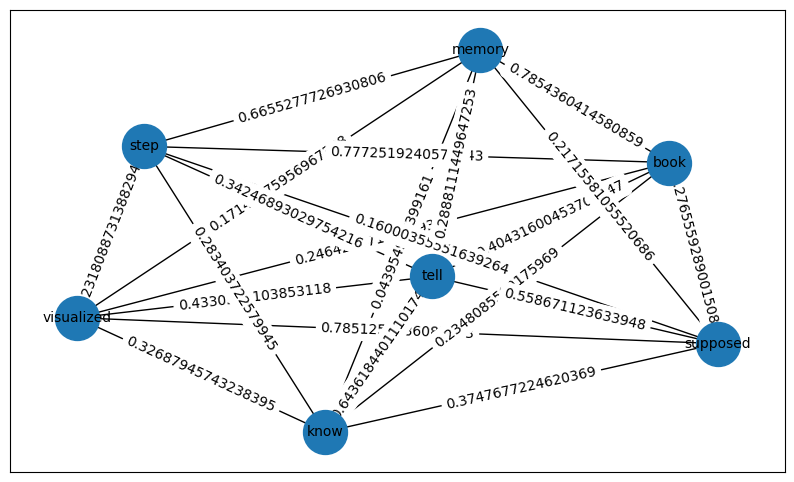

TOPIC 19 :


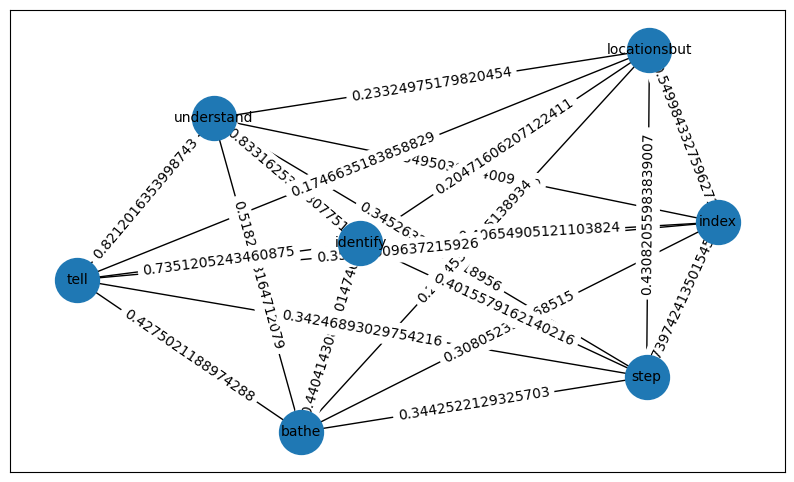

In [ ]:
for k,v in topics.items():
  print("TOPIC",k,":")
  sentimentSimilarity(v)

In [ ]:
import spacy
import numpy as np
from sklearn.cluster import KMeans


def group_similar_words(text):
    doc = nlp(text)
    tokens = [token for token in doc if not token.is_stop and token.is_alpha]
    word_vectors = np.array([token.vector for token in tokens])
    kmeans = KMeans(n_clusters=5, random_state=0).fit(word_vectors)

    clusters = {}
    for i, token in enumerate(tokens):
        cluster_label = kmeans.labels_[i]
        if cluster_label not in clusters:
            clusters[cluster_label] = []
        clusters[cluster_label].append(token.text)
        

    return list(clusters.values())
l = group_similar_words(processed_input_text)

groups = []
for i in l:
  res = [*set(i)]
  groups.append(res)

print(groups)

[['arrange', 'location', 'element', 'items', 'store', 'array', 'position', 'elevator'], ['identify', 'store', 'tell', 'know', 'understand', 'stand'], ['locationsbut', 'bathe', 'unique', 'different', 'easily'], ['supposed', 'visualized'], ['escalatorhoweverevery', 'index', 'element', 'step', 'memory', 'book', 'position', 'type']]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
ind = 1
for i in groups:
  print("GROUP : "ind)
  ind = ind+1
  print(i)

1
['arrange', 'location', 'element', 'items', 'store', 'array', 'position', 'elevator']
2
['identify', 'store', 'tell', 'know', 'understand', 'stand']
3
['locationsbut', 'bathe', 'unique', 'different', 'easily']
4
['supposed', 'visualized']
5
['escalatorhoweverevery', 'index', 'element', 'step', 'memory', 'book', 'position', 'type']


<ipython-input-50-3c80a553d10f>:11: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  similarity = nlp(word1).similarity(nlp(word2))


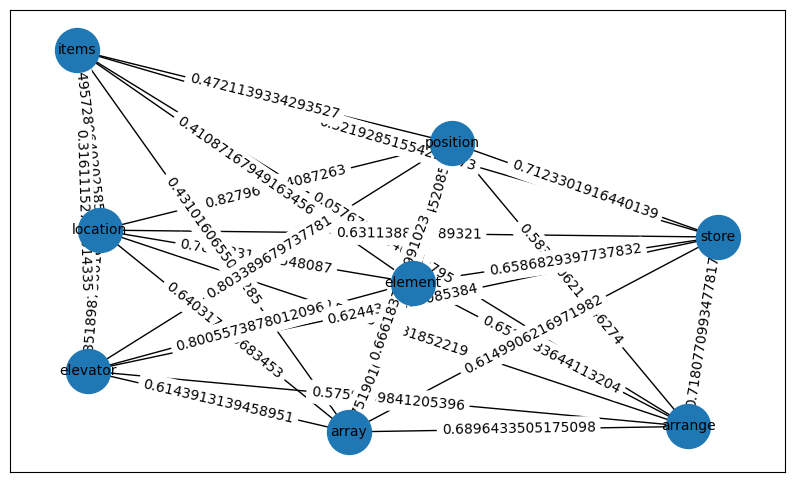

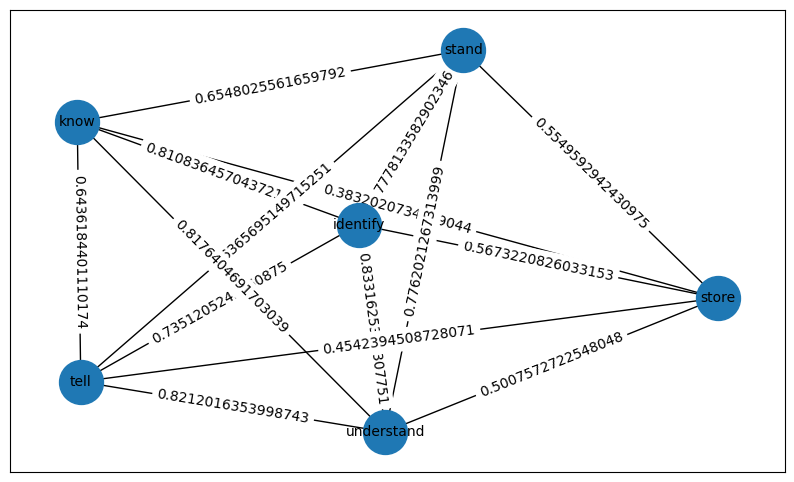

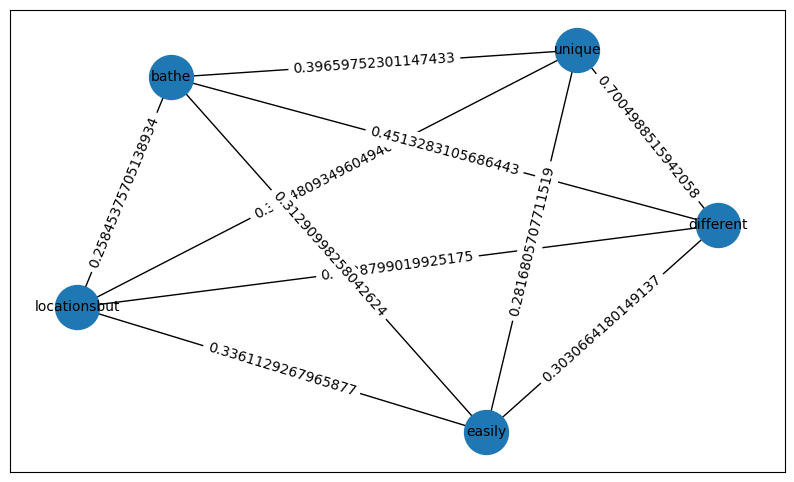

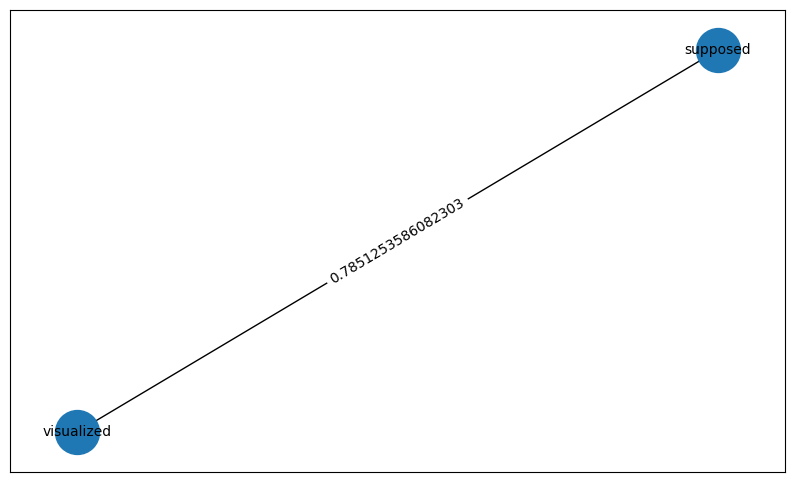

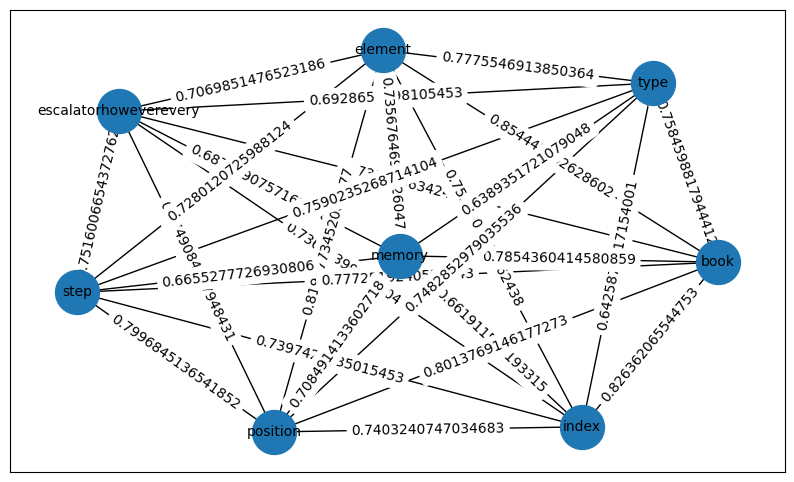

In [ ]:
for i in groups:
  sentimentSimilarity(' '.join(i))

In [ ]:
def spacy_similarity(text1, text2):
    doc1 = nlp(text1)
    doc2 = nlp(text2)
    similarity = doc1.similarity(doc2)
    return similarity
print(spacy_similarity(ref_text, input_text))
print(spacy_similarity(processed_ref_text, processed_input_text))

0.8652874688253835
0.9549786310413406


<ipython-input-54-1ea889fabb4b>:4: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  similarity = doc1.similarity(doc2)


In [ ]:
import tensorflow_hub as hub
import tensorflow_text as tf
from tensorflow.python.keras import losses

In [ ]:
def tf_similarity(text1, text2):
  model = hub.load('https://tfhub.dev/google/universal-sentence-encoder-multilingual-large/3')
  vectors = model([text1, text2])
  similarity_score = losses.cosine_similarity(vectors[0], vectors[1]).numpy()
  return -similarity_score


In [ ]:
print(tf_similarity(ref_text, input_text))
print(tf_similarity(processed_ref_text, processed_input_text))

0.7041434
0.73984516


In [ ]:
print("Similarity in the given answer from the reference asnwer is ", ( tf_similarity(processed_ref_text, processed_input_text) + spacy_similarity(processed_ref_text, processed_input_text))/2)

Similarity in the given answer from the reference asnwer is  0.8474118938554787


<ipython-input-54-1ea889fabb4b>:4: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  similarity = doc1.similarity(doc2)
